# 주성분 분석의 기초
<!-- 9-1 -->

In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False

1. 좌표계와 벡터의 차이

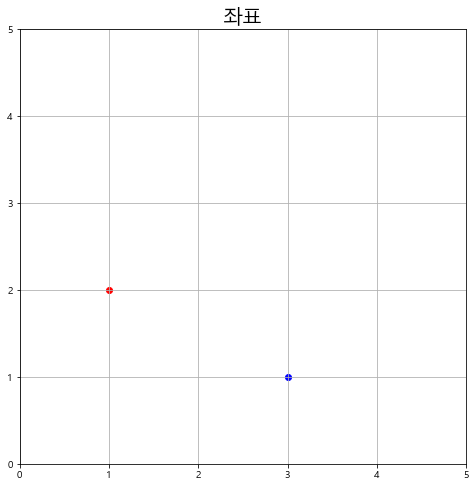

In [2]:
a = np.array([1, 2])
b = np.array([3, 1])

# 좌표
plt.figure(figsize = (8, 8))
plt.title('좌표', fontsize = 20)
plt.scatter(a[0], a[1], color = 'red')
plt.scatter(b[0], b[1], color = 'blue')
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.grid()
plt.show()
plt.close()

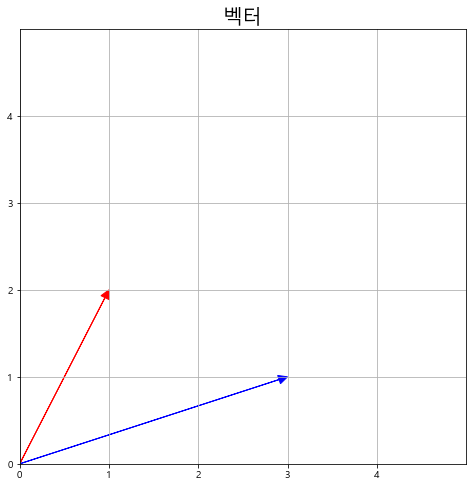

In [3]:
# 벡터
plt.figure(figsize = (8, 8))
plt.title('벡터', fontsize = 20)
plt.arrow(0, 0, a[0], a[1], head_width = .1, head_length = .1, length_includes_head = True, color = 'red')
plt.arrow(0, 0, b[0], b[1], head_width = .1, head_length = .1, length_includes_head = True, color = 'blue')
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.xticks(ticks = np.arange(0, 5, step = 1))
plt.yticks(ticks = np.arange(0, 5, step = 1))
plt.grid()
plt.show()
plt.close()

여기서 가져야할 의문점: 점을 사용한 위치좌표계와 화살표를 사용한 벡터공간의 차이점은 무엇인가?

- 연산에 대한 체계가 위치만을 표시하는 집합(set)위에서 정의됨.
- 집합만 있을 때는 위치에 대한 개념만 있었다면, 연산(addition, scalar multiplication)이 도입되면서 연산과정 혹은 연산의 결과를 잘 나타낼 수 있는 시각적인 도구가 도입됨 (화살표)

In [5]:
a + b

array([4, 3])

위 a+b의 결과를 숫자로 표시한 경우 계산 결과만의 의미를 가지고 있지만, 좌표계에서 화살표로 연산의 과정을 표시할 때 그 과정을 체계적으로 분석할 수 있다.

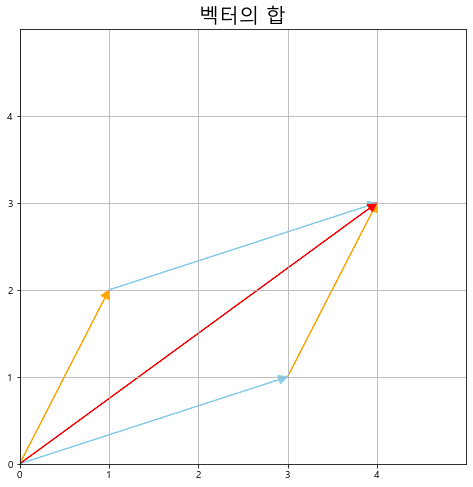

In [7]:
plt.figure(figsize = (8, 8))
plt.title('벡터의 합', fontsize = 20)
plt.arrow(0, 0, a[0], a[1], head_width = .1, head_length = .1, length_includes_head = True, color = 'orange')
plt.arrow(b[0], b[1], a[0], a[1], head_width = .1, head_length = .1, length_includes_head = True, color = 'orange')
plt.arrow(0, 0, b[0], b[1], head_width = .1, head_length = .1, length_includes_head = True, color = 'skyblue')
plt.arrow(a[0], a[1], b[0], b[1], head_width = .1, head_length = .1, length_includes_head = True, color = 'skyblue')
plt.arrow(0, 0, a[0] + b[0], a[1] + b[1], head_width = .1, head_length = .1, length_includes_head = True, color = 'red')
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.xticks(ticks = np.arange(0, 5, step = 1))
plt.yticks(ticks = np.arange(0, 5, step = 1))
plt.grid()
plt.show()
plt.close()

In [8]:
# 벡터의 스칼라 곱
2 * a
-1 * a

array([-1, -2])

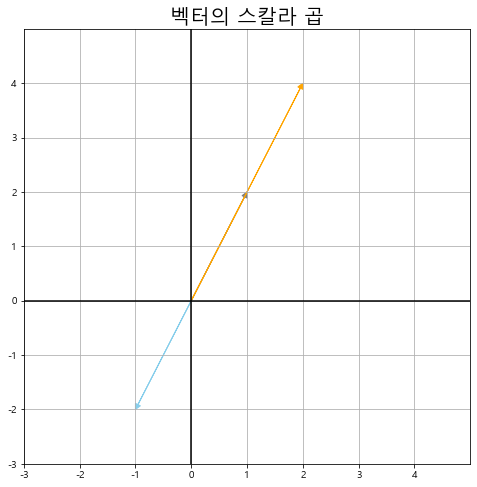

In [9]:
plt.figure(figsize = (8, 8))
plt.title('벡터의 스칼라 곱', fontsize = 20)
plt.arrow(0, 0, a[0], a[1], head_width = .1, head_length = .1, length_includes_head = True, color = 'gray')
plt.arrow(0, 0, 2*a[0], 2*a[1], head_width = .1, head_length = .1, length_includes_head = True, color = 'orange')
plt.arrow(0, 0, -1*a[0], -1*a[1], head_width = .1, head_length = .1, length_includes_head = True, color = 'skyblue')
plt.xlim(-3, 5)
plt.ylim(-3, 5)
plt.xticks(ticks = np.arange(-3, 5, step = 1))
plt.yticks(ticks = np.arange(-3, 5, step = 1))
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.grid()
plt.show()
plt.close()

이차원 상의 모든 점은 기저벡터들의 선형결합으로 표현할 수 있다. 아래는 특별한 기저 벡터 두개를 표시한 그림이다. 임의 벡터 (a,b)를 이 기저벡터로 표시해보자.

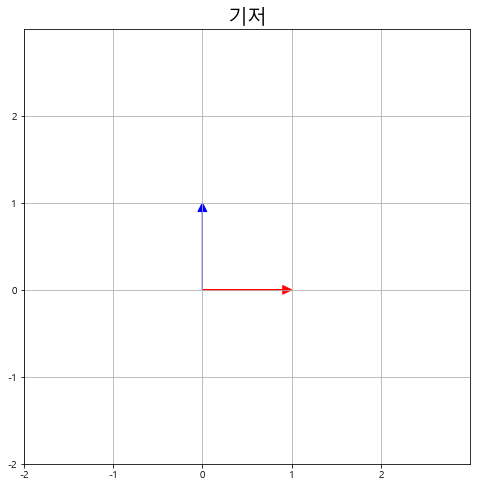

In [10]:
plt.figure(figsize = (8, 8))
plt.title('기저', fontsize = 20)
plt.arrow(0, 0, 1, 0, head_width = .1, head_length = .1, length_includes_head = True, color = 'red')
plt.arrow(0, 0, 0, 1, head_width = .1, head_length = .1, length_includes_head = True, color = 'blue')
plt.xlim(-2, 3)
plt.ylim(-2, 3)
plt.xticks(ticks = np.arange(-2, 3, step = 1))
plt.yticks(ticks = np.arange(-2, 3, step = 1))
plt.grid()
plt.show()
plt.close()

여기서는 데이터를 벡터로 표시하고 이해하는 방법에 대해 알아본다. 임의의 데이터 행렬 
$X\in \mathbb{R}^{n \times p}$ (n행 p열 데이터 행렬)이 주어져 있다고 가정하자.
- 각 행($x_i^\top \in \mathbb{R}^p$)은 관측치를 나타냄
- 각 열($X_j \in \mathbb{R}^p$)은 변수를 나타냄
- 예) 120명의 환자를 대상으로 나이, 성별, 10가지 건강검진 결과를 기록한 데이터 행렬을 생각해보자. 이 데이터 행렬은 n=120, p=12 다. 

데이터를 벡터공간에 표시하는 방법은 세 가지다.
- 행 벡터를 벡터공간의 원소로 이해하는 방법 (데이터 간의 거리, 산포, 군집화에 대한 시각화)
- 열 벡터를 벡터공간의 원소로 이해하는 방법 (변수들 간의 관계, 차원 축약에 대한 시각화)
- 데이터를 선형변환(linear map)으로 이해하는 방법 (차원 축약)

행렬을 선형변환으로 다루기 위해 세 개의 $n\times p$ 행렬을 정의한다. 
$$ C = A + B$$

In [15]:
# 행렬의 덧셈과 곱셈
A = np.random.exponential(size = (n, p))
B = np.random.uniform(size = (n, p))
C = A + B
# 입력벡터로서 bvec
x = np.random.uniform(size = (p, 1))

아래는 선형변환으로 성질 중 $A+B$로 정의한 선형변환 $C$의 성질을 이해하기 위해 출력값을 확인하는 예다.

In [16]:
print("Ax+Bx=",A@x + B@x)
print("Cx=",C@x)

Ax+Bx= [[4.5320103 ]
 [4.76165225]
 [4.19676325]
 [2.74026979]
 [4.54889027]
 [2.51473937]
 [4.3253096 ]
 [3.36702811]
 [1.75103652]
 [3.30512356]]
Cx= [[4.5320103 ]
 [4.76165225]
 [4.19676325]
 [2.74026979]
 [4.54889027]
 [2.51473937]
 [4.3253096 ]
 [3.36702811]
 [1.75103652]
 [3.30512356]]


데이터 행렬 $X$와 계수벡터 $b$의 곱을 열벡터의 선형결합으로 이해해보자.
$$Y = X\beta \in \mathbb{R}^n$$

In [18]:
# 행렬의 이미지
n = 10
p = 5
np.random.seed(1)
x = np.random.normal(size = (n, p))
beta = np.random.uniform(size = (p, 1))
y = x @ beta

y가 $\sum_{j=1}^p \beta_j X_j$로 표현됨을 확인해보자. 이 결과는 $y = X\beta$가 열벡터 $X_j$들의 선형결합으로 표현되며 $X\beta$가 $X$ 열벡터가 속한 (혹은 생성하는) 선형공간의 원소임을 의미한다. 

- 위 내용을 그림으로 표현해보아라.

In [20]:
# columnwise operation
z = np.zeros(n)
for i in range(p):
    z += x[:, i] * beta[i]
z = z.reshape(-1, 1)

np.concatenate((y, z), axis = 1)

array([[ 0.7876209 ,  0.7876209 ],
       [-1.78694454, -1.78694454],
       [ 1.13354049,  1.13354049],
       [-0.87375819, -0.87375819],
       [ 0.05259844,  0.05259844],
       [-0.77028632, -0.77028632],
       [-1.72444884, -1.72444884],
       [ 1.50280902,  1.50280902],
       [ 0.98728556,  0.98728556],
       [ 0.0857615 ,  0.0857615 ]])

In [108]:
## 2. 차원 축약과 축약방법 선택
n = 100
p = 5
np.random.seed(1)
e = np.random.normal(loc = 0, scale = 1, size = (n, p))
A = np.random.normal(size = (5,5))
x = e@A
A

array([[-1.71939447,  0.057121  , -0.79954749, -0.2915946 , -0.25898285],
       [ 0.1892932 , -0.56378873,  0.08968641, -0.6011568 ,  0.55607351],
       [ 1.69380911,  0.19686978,  0.16986926, -1.16400797,  0.69336623],
       [-0.75806733, -0.8088472 ,  0.55743945,  0.18103874,  1.10717545],
       [ 1.44287693, -0.53968156,  0.12837699,  1.76041518,  0.96653925]])

$$X \sim MNV(0, A^\top A)$$

In [110]:

scaled_x = StandardScaler(with_std=False).fit_transform(x)

sklearn.preprocessing 에 있는  StandardScaler.fit_transform()을 이용하여 data standardization 을 수행한다.

In [111]:
print("location:",scaled_x.mean(axis = 0))
print("scaling:",scaled_x.std(axis = 0))

location: [ 1.11022302e-17 -3.27515792e-17 -1.39888101e-16 -4.44089210e-17
  2.22044605e-17]
scaling: [2.81134733 0.99466762 0.93685465 2.2916709  1.62308069]


먼저 완전한 데이터 행렬의 열공간에서 표현능력 (representation power)를 정의해보자.
- 데이터 $X$의 표현능력은 계수행렬에 대한 반응치 $X\beta$의 변화로 정의한다. $\beta$에 대해 $X\beta$의 값의 변화가 크게 나타날 수 있는 경우 $X$의 표현력이 크다고 하자.
- $X\beta$는 비록 $n$차원 공간의 원소지만 실제로 $X\beta$가 속한 공간의 크기는  $p$차원보다 작거나 같다. 
- $X\beta$가 모든 $\beta$에 대해 한점이라면 $X$의 표현능력은 0이라고 하자.
- 길이가 1인 벡터 $\beta$에 대해 $\|X\beta\|$의 크기를 벡표터 $\beta$방향으로 $X$의 표현능력이라고 할 수 있다.
$$\text{representation power}=\sup_{\beta}\frac{\|X\beta\|}{\|\beta\|}$$
- 표현능력이 큰 $\beta$ 방향이 있을 것인데, 이는 $X$의 열벡터를 $\beta$ 원소의 가중치로 선형결합해서 나온 새로운 변수가 표현능력이 크다는 것을 의미한다. (제1 주성분)

In [112]:
beta = np.random.uniform(size = (p, 1))
y = x @ beta

- 주성분 분석은 $X$의 표현력이 큰 방향을 찾는 것이다. (X는 열평균이 0인 상황을 가정한다)
- sklearn의 PCA()를 이용한다.
- 여기서는 $p=5$인 상황에서 설명력이 큰 방향 5개 모두 찾는다. (최대 개수가 $p=5$)

$$X^\top X/n = EDE^\top$$

In [113]:
# 주성분 벡터 찾기
pca = PCA(n_components=5)
pca.fit(scaled_x)

PCA(n_components=5)

- 설명력이 강한 방향은 $p$개의 변수들의 선형결합으로 표현된다. 데이터 행렬이 어떤 변수의 조합들로 표현능력이 극대화되는지 확인할 수 있다.
- 설명력이 가장 강한 방향은 $E$행렬의 첫번째 열을 확인하면 된다. PCA 결과로는  'pca.components_.transpose()'의 첫번째 열의 값을 확인한다.  

In [114]:
# eigen matrix (E[:,0:4])
E=pca.components_.transpose()
# for simplicity 
E = np.round(E,2)
E

array([[-0.91,  0.11,  0.37,  0.03, -0.17],
       [ 0.07,  0.02,  0.56, -0.02,  0.83],
       [-0.16,  0.1 , -0.27, -0.93,  0.16],
       [-0.17, -0.98, -0.08, -0.04,  0.09],
       [-0.35,  0.16, -0.69,  0.36,  0.5 ]])

In [115]:
print("설명력이 가장 큰 변수: {}X1+{}X2+{}X3+{}X4+{}X5".format(E[0,0], E[1,0], E[2,0], E[3,0], E[4,0]))

설명력이 가장 큰 변수: -0.91X1+0.07X2+-0.16X3+-0.17X4+-0.35X5


In [116]:
# eigenvalue
pca.explained_variance_.sum()


17.835232869963352

In [117]:
# 설명력
pca.explained_variance_ratio_

array([0.5144769 , 0.29473102, 0.15985695, 0.02539647, 0.00553866])

In [118]:
# 누적 설명력
np.cumsum(pca.explained_variance_ratio_)

array([0.5144769 , 0.80920792, 0.96906487, 0.99446134, 1.        ])

- pca component는 데이터의 표현형을 나타내는 것으로 데이터 열벡터의 조합을 어떻게 하면 표현력이 좋아지는지 계수정보를 제공한다.
- 한편 표현형이 우수한 조합을 이용해 데이터를 재표현할 수 있을 것이다. 예를 들어 신체의 발달상태를 나타내는 좋은 변수로 BMI 식이 데이터 표현형이라면 어떤 사람의 BMI를 계산하는 것은 데이터를 BMI로 재표현하는 것으로 이해하면 된다.
- 데이터의 재표현 값을 PCA score 라 흔히 부르며 fit_transform() 함수를 이용하여 구할 수 있다. 아래 예시는 주요한 데이터 표현형 2개에 대해서 데이터를 재표현한 결과다.


In [121]:
pc_score = pca.fit_transform(scaled_x)

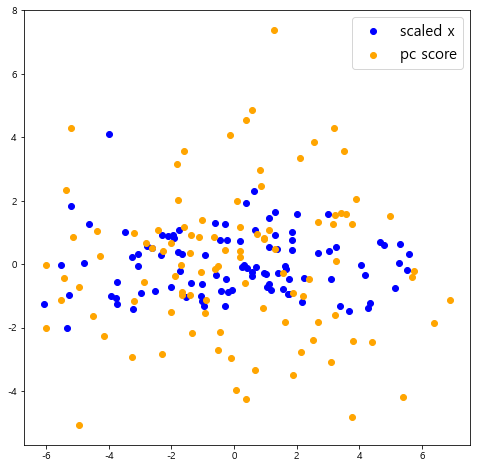

In [122]:

plt.figure(figsize = (8, 8))
plt.scatter(scaled_x[:, 0], scaled_x[:, 1], color = 'blue', label = 'scaled x')
plt.scatter(pc_score[:, 0], pc_score[:, 1], color = 'orange', label = 'pc score')
plt.legend(fontsize = 15)
plt.show()
plt.close()

In [ ]:

#%%
# --------------- 9-2 SVD --------------- #
### 9-2-1 내적과 각도, 정사영
seed = 0
np.random.seed(seed)

n = 2
v1 = np.random.normal(size = n)
v2 = np.random.uniform(size = n)

# elementwise product
v1 * v2

# norm
np.sqrt(np.sum(v1 * v1))
np.linalg.norm(v1)

def vec_norm(vec):
    output = np.linalg.norm(vec)
    return output

vec_norm(v1)

# inner product
np.sum(v1 * v2)
np.dot(v1.T, v2)

# innter product를 이용하여 벡터의 norm 계산
np.sqrt(np.dot(v1.T, v1))

# 두 개의 벡터 그려보기
plt.figure(figsize = (8, 8))
plt.arrow(0 ,0, v1[0], v1[1], head_width = .1, head_length = .1, length_includes_head = True, color = 'red')
plt.arrow(0 ,0, v2[0], v2[1], head_width = .1, head_length = .1, length_includes_head = True, color = 'blue')
plt.xlim(-1, 2)
plt.ylim(-1, 2)
plt.grid()
plt.show()
plt.close()

# 두 벡터 사이의 코사인 유사도 구하기
cos_sim = np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))
cos_sim = np.dot(v1, v2) / (vec_norm(v1) * vec_norm(v2))

def cosine_similarity(vec1, vec2):
    cosim = np.dot(vec1, vec2) / (vec_norm(vec1) * vec_norm(vec2))
    return cosim

cosine_similarity(v1, v2)

# 정사영
# v2의 v1위로 정사영
def projection(vec1, vec2):
    proj = (np.dot(vec1, vec2) / vec_norm(vec1)) * (vec1 / vec_norm(vec1))
    return proj

proj_vec = projection(v1, v2)

plt.figure(figsize = (8, 8))
plt.arrow(0 ,0, v1[0], v1[1], head_width = .1, head_length = .1, length_includes_head = True, color = 'gray')
plt.arrow(0 ,0, v2[0], v2[1], head_width = .1, head_length = .1, length_includes_head = True, color = 'gray')
plt.arrow(0, 0, proj_vec[0], proj_vec[1], head_width = .1, head_length = .1, length_includes_head = True, color = 'red')
plt.arrow(proj_vec[0], proj_vec[1], v2[0]-proj_vec[0], v2[1]-proj_vec[1], head_width = 0, head_length = 0, length_includes_head = True, color = 'gray', linestyle = 'dashed')
plt.xlim(-1, 2)
plt.ylim(-1, 2)
plt.grid()
plt.show()
plt.close()


### 9-2-2 선형변환으로서 직교행렬과 대각행렬
seed = 0
np.random.seed(seed)

n = 2
mat = np.random.normal(size = (n, n))

# 대각행렬
diag_mat1 = np.identity(n)
trans_mat1 = mat @ diag_mat1

print(f'original matrix: \n{mat} \ntransformed matrix:\n{trans_mat1}')

#
diag_elem = [0.5, 2]
diag_mat2 = diag_elem * np.identity(n)
trans_mat2 = mat @ diag_mat2

plt.figure(figsize = (8, 8))
plt.arrow(0 ,0, mat[:, 0][0], mat[:, 0][1], head_width = .1, head_length = .1, length_includes_head = True, color = 'gray')
plt.arrow(0 ,0, mat[:, 1][0], mat[:, 1][1], head_width = .1, head_length = .1, length_includes_head = True, color = 'gray')
plt.arrow(0 ,0, trans_mat2[:, 0][0], trans_mat2[:, 0][1], head_width = .1, head_length = .1, length_includes_head = True, color = 'red')
plt.arrow(0 ,0, trans_mat2[:, 1][0], trans_mat2[:, 1][1], head_width = .1, head_length = .1, length_includes_head = True, color = 'blue')
plt.xlim(-1, 5)
plt.ylim(-1, 5)
plt.grid()
plt.show()
plt.close()

print(f'original matrix: \n{mat} \ntransformed matrix:\n{trans_mat2}')

# 
diag_elem = np.diag(mat)
diag_mat3 = diag_elem * np.identity(n)
trans_mat3 = mat @ diag_mat3

plt.figure(figsize = (8, 8))
plt.arrow(0 ,0, mat[:, 0][0], mat[:, 0][1], head_width = .1, head_length = .1, length_includes_head = True, color = 'gray')
plt.arrow(0 ,0, mat[:, 1][0], mat[:, 1][1], head_width = .1, head_length = .1, length_includes_head = True, color = 'gray')
plt.arrow(0 ,0, trans_mat3[:, 0][0], trans_mat3[:, 0][1], head_width = .1, head_length = .1, length_includes_head = True, color = 'red')
plt.arrow(0 ,0, trans_mat3[:, 1][0], trans_mat3[:, 1][1], head_width = .1, head_length = .1, length_includes_head = True, color = 'blue')
plt.xlim(-1, 6)
plt.ylim(-1, 6)
plt.grid()
plt.show()
plt.close()

print(f'original matrix: \n{mat} \ntransformed matrix:\n{trans_mat3}')

# 직교행렬
mat2 = np.array([1, 2, 3, 5]).reshape(2, 2)

q, r = np.linalg.qr(mat2)
q @ q.T

trans_mat4 = q @ mat2

plt.figure(figsize = (8, 8))
plt.arrow(0 ,0, mat2[:, 0][0], mat2[:, 0][1], head_width = .1, head_length = .1, length_includes_head = True, color = 'skyblue')
plt.arrow(0 ,0, mat2[:, 1][0], mat2[:, 1][1], head_width = .1, head_length = .1, length_includes_head = True, color = 'orange')
plt.arrow(0 ,0, trans_mat4[:, 0][0], trans_mat4[:, 0][1], head_width = .1, head_length = .1, length_includes_head = True, color = 'red')
plt.arrow(0 ,0, trans_mat4[:, 1][0], trans_mat4[:, 1][1], head_width = .1, head_length = .1, length_includes_head = True, color = 'blue')
plt.xlim(-6, 6)
plt.ylim(-6, 6)
plt.grid()
plt.show()
plt.close()

print(f'original matrix: \n{mat2} \ntransformed matrix:\n{trans_mat4}')

# 
q, r = np.linalg.qr(mat)
q @ q.T

trans_mat5 = q @ mat
# trans_mat5 = q.T @ mat @ q

plt.figure(figsize = (8, 8))
plt.arrow(0 ,0, mat[:, 0][0], mat[:, 0][1], head_width = .1, head_length = .1, length_includes_head = True, color = 'skyblue')
plt.arrow(0 ,0, mat[:, 1][0], mat[:, 1][1], head_width = .1, head_length = .1, length_includes_head = True, color = 'orange')
plt.arrow(0 ,0, trans_mat5[:, 0][0], trans_mat5[:, 0][1], head_width = .1, head_length = .1, length_includes_head = True, color = 'red')
plt.arrow(0 ,0, trans_mat5[:, 1][0], trans_mat5[:, 1][1], head_width = .1, head_length = .1, length_includes_head = True, color = 'blue')
plt.xlim(-6, 6)
plt.ylim(-6, 6)
plt.grid()
plt.show()
plt.close()

print(f'original matrix: \n{mat2} \ntransformed matrix:\n{trans_mat4}')


### 9-2-3 행렬의 특이치 분해
n = 10
p = 2

seed = 0
np.random.seed(seed)

x = np.random.normal(size = (n, p))
u, s, vh= np.linalg.svd(x, full_matrices=False)
u.shape
s.shape
vh.shape

# UDV^T 에서 V^T matrix를 확인
# V행렬의 열벡터는 직교함
(vh[0,:]*vh[1,:]).sum()

# 0번 obs의 표현형
u[0,:]

# scaled
plt.plot(u[:,0],u[:,1], '.')

# considering the size s
plt.plot(s[0]*u[:,0],s[1]*u[:,1], '.')

# approximation
k = 1
x_approx = u[:,:k]@np.diag(s[:k])@vh[:k,:]
print( np.mean((x-x_approx)**2) )

# 주성분 값을 이용한 데이터의 재표현
x
u@np.diag(s)@vh

# x^T
x.T
vh.T@(np.diag(s)).T@u.T

#
x.T@x
vh.T@(np.diag(s)).T@u.T@u@(np.diag(s))@vh

# covariance
(x - np.mean(x, axis = 0)).T@(x - np.mean(x, axis = 0))/x.shape[0]
covmat = np.cov(x, rowvar = False, bias = True)
covmat

centered_x = np.zeros_like(x)
for i in range(x.shape[1]):
    centered_x[:, i] = x[:, i] - np.mean(x[:, i])

u, s, vh= np.linalg.svd(centered_x, full_matrices=False)
vh.T@(np.diag(s)).T@u.T@u@(np.diag(s))@vh
covmat


#%%
# --------------- 9-3 PCA 실습 --------------- #
### 9-3-1 SVD를 통한 주성분 분석의 구현과 시각화
seed = 0
np.random.seed(seed)

mu = [0, 0]
sigma = [[0.6, 0.3], [0.1, 0.1]]
n = 1000
x = np.random.multivariate_normal(mu, sigma, n)
cov_mat = np.cov(x, rowvar = False)

# scatter plot
plt.figure(figsize = (8, 8))
plt.scatter(x[:, 0], x[:, 1], alpha = 0.5)
plt.xlabel('x1', fontsize = 15)
plt.ylabel('x2', fontsize = 15)
plt.show()
plt.close()

# pca
eigval1, eigvec1 = np.linalg.eig(cov_mat)

#
u, s, vh = np.linalg.svd(x, full_matrices = False)
u.shape
s.shape
vh.shape

#
x
u@np.diag(s)@vh

# 
eigval2 = s**2/(n-1)
eigvec2 = u

print(f'eigenvalues using PCA: {eigval1},\
    \neigenvalues using SVD: {eigval2}')

#
plt.figure(figsize = (8, 8))
plt.scatter(x[:, 0], x[:, 1], alpha = 0.5)
plt.quiver([0, 0], [0, 0], vh[0], vh[1], color = ['red', 'blue'], scale = 3)
plt.xlabel('x1', fontsize = 15)
plt.ylabel('x2', fontsize = 15)
plt.show()
plt.close()


# image data의 SVD
# imae data load
iris_img = plt.imread('iris.jpg')
iris_img.shape
iris_img

plt.imshow(iris_img)
plt.show()
plt.close()

# image data를 2d로 바꿔줌
def rgb2gray(img):
    gray_img = np.dot(img[...,:3], [0.30, 0.59, 0.11])
    return gray_img

iris_img = rgb2gray(iris_img)

plt.imshow(iris_img, cmap = 'gray')
plt.show()
plt.close()

# SVD
u, s, vh = np.linalg.svd(iris_img, full_matrices = False)
u.shape
s.shape
vh.shape

# eigenvalue가 큰 30개만 이용
k = 30
topk_s = np.diag(s[:k])
topk_s.shape

recovered = u[:, :k] @ topk_s @ vh[:k, :]

plt.imshow(recovered, cmap = 'gray')
plt.show()
plt.close()

_, ax = plt.subplots(1, 2, figsize = (16, 8))
ax[0].imshow(iris_img, cmap = 'gray')
ax[1].imshow(recovered, cmap = 'gray')
plt.show()
plt.close()

### 9-3-2 PCA 실습1 (지수의 생산)
from sklearn import datasets

iris = datasets.load_iris()
iris # dictionary 형태로 되어있음

# iris data에 포함된 key확인
iris.keys()

# iris data의 설명
print(iris.DESCR)

iris.feature_names
iris.target_names

# 적은 수의 변수로 먼저 실험
# sepal length, petal length를 x로 사용
x = iris.data[:, [0, 2]]
y = iris.target

x.shape
y.shape

# 결측치 확인
np.sum(np.isnan(x), axis = 0)
np.isnan(y).sum()

# x의 산점도
plt.figure(figsize = (8, 8))
plt.scatter(x[:, 0], x[:, 1])
plt.xlabel('sepal length', fontsize = 15)
plt.ylabel('petal length', fontsize = 15)
plt.show()
plt.close()

# histogram
plt.figure(figsize = (8, 8))
plt.hist(x[:, 0], bins = 20)
plt.show()
plt.close()

plt.figure(figsize = (8, 8))
plt.hist(x[:, 1], bins = 20)
plt.show()
plt.close()

# pca함수를 이용해 pc score 계산
pca = PCA(n_components = 2)
pca.fit(x)

# eigenvalue
eigenvalue = pca.explained_variance_

# eigenvector
eigenvector = pca.components_.transpose()

# pc score
pc_score = pca.transform(x)

# 직접 pc score 구하기 위해 x를 centering
centered_x = np.zeros_like(x)
for i in range(x.shape[1]):
    centered_x[:, i] = x[:, i] - np.mean(x[:, i])

pc_score2 = centered_x @ eigenvector

pc_score[:5]; pc_score2[: 5]

# pc score 산점도
plt.figure(figsize = (8, 8))
plt.scatter(pc_score[:, 0], pc_score[:, 1])
plt.xlabel('pc1', fontsize = 15)
plt.ylabel('pc2', fontsize = 15)
plt.show()
plt.close()

# centering된 데이터의 산점도와 eigenvector 방향 그림
plt.figure(figsize = (8, 8))
plt.scatter(centered_x[:, 0], centered_x[:, 1])
# plt.quiver([0,0], [0,0], [1,0], [1,-1])인 경우 [0,0]->[1,1]방향, [0,0]->[0,-1]방향을 가르킴
plt.quiver([0, 0], [0, 0], eigenvector[0], eigenvector[1], color = ['red', 'blue'], scale = 3)
plt.show()
plt.close()

# numpy로 pc score 구하기
data = x
data -= np.mean(data, axis = 0)
cov = np.cov(data ,rowvar = False)

eigval, eigvec = np.linalg.eigh(cov)

print(f'eigenvalues using scikit-learn: {eigenvalue},\
      \neigenvalues using numpy: {eigval}')
print(f'eigenvvectors using scikit-learn: \n{eigenvector},\
      \neigenvvectors using numpy: \n{eigvec}')


### 9-3-3 PCA 실습2 (Hyperspectral data 분석)
iris_img = plt.imread('iris.jpg')
iris_img.shape
iris_img

plt.imshow(iris_img)
plt.show()
plt.close()

_, ax = plt.subplots(1, 3, figsize = (24, 8))
for i in range(len(ax)):
    ax[i].imshow(iris_img[:, :, i])
plt.show()
plt.close()

w, h, c = iris_img.shape

x = iris_img.reshape((w*h), c)
scaled_x = StandardScaler().fit_transform(x)
scaled_x.mean(axis = 0)
scaled_x.std(axis = 0)

pca = PCA(n_components=3)
pca.fit(scaled_x)
pc_score = pca.fit_transform(scaled_x)

plt.imshow(pc_score.reshape(w, h, c))
plt.show()
plt.close()


# 설명력
pca.explained_variance_ratio_

# 고유치
eigval = pca.explained_variance_

# 고유벡터
eigvec = pca.components_.transpose()

# 고유벡터를 이용하여 이미지 복원
recovered = np.dot((np.dot(scaled_x, eigvec)), eigvec.T) # + scaled_x.mean(axis = 0)
recovered = recovered.reshape(w, h, c)

plt.imshow(recovered)
plt.show()
plt.close()

_, ax = plt.subplots(2, 4, figsize = (32, 16))
ax[0, 0].imshow(iris_img)
ax[1, 0].imshow(recovered)
for i in range(3):
    ax[0, i+1].imshow(iris_img[:, :, i])
    ax[1, i+1].imshow(recovered[:, :, i])
plt.show()
plt.close()

# 이미지 복원
recovered = pca.inverse_transform(pc_score)
recovered = recovered.reshape(w, h, c)

plt.imshow(recovered)
plt.show()
plt.close()

_, ax = plt.subplots(2, 4, figsize = (32, 16))
ax[0, 0].imshow(iris_img)
ax[1, 0].imshow(recovered)
for i in range(3):
    ax[0, i+1].imshow(iris_img[:, :, i])
    ax[1, i+1].imshow(recovered[:, :, i])
plt.show()
plt.close()


#
# whiten = True: the components_ vectors are multiplied by the square root of n_samples and then divided by the singular values to ensure uncorrelated outputs with unit component-wise variances.
pca = PCA(n_components=3, whiten=True)
pca.fit(scaled_x)
pc_score = pca.fit_transform(scaled_x)

eigval = pca.explained_variance_
eigvec = pca.components_.transpose()

#
recovered = np.dot(np.dot(scaled_x, eigvec)/np.sqrt(eigval), np.sqrt(eigval[:, np.newaxis]) * eigvec.T)
recovered = recovered.reshape(w, h, c)

plt.imshow(recovered)
plt.show()
plt.close()

_, ax = plt.subplots(2, 4, figsize = (32, 16))
ax[0, 0].imshow(iris_img)
ax[1, 0].imshow(recovered)
for i in range(3):
    ax[0, i+1].imshow(iris_img[:, :, i])
    ax[1, i+1].imshow(recovered[:, :, i])
plt.show()
plt.close()

#
recovered = pca.inverse_transform(pc_score)
recovered = recovered.reshape(w, h, c)

plt.imshow(recovered)
plt.show()
plt.close()

_, ax = plt.subplots(2, 4, figsize = (32, 16))
ax[0, 0].imshow(iris_img)
ax[1, 0].imshow(recovered)
for i in range(3):
    ax[0, i+1].imshow(iris_img[:, :, i])
    ax[1, i+1].imshow(recovered[:, :, i])
plt.show()
plt.close()
